In [57]:
#Prepare Environment

import graph_tool.all as gt
print(gt.__version__)

2.58 (commit , )


In [58]:
#Check the version of the Graph Tool
import gtk
import gi
gi.require_version('Gtk', '3.0')
from gi.repository import Gtk

import matplotlib.pyplot as plt

In [59]:
#Open the Video dataframe

import pandas as pd

# Navigate up one directory to find the CSV file
csv_path = '../csv/video_df_sep.csv'

# Read the CSV file into a DataFrame
corpus = pd.read_csv(csv_path)


In [60]:
# Check empty strings in the 'signature_mod' column

empty_strings = (corpus['stickersText'] == '').sum()
print(f"Number of empty strings: {empty_strings}")


Number of empty strings: 0


In [61]:
#Check th legnth of thr document
len(corpus)

4889

In [62]:
#PREPROCESSING
#1. Expanding English contractions
#2. Separating joint English words
#3. Keeping only alphabetical characters: all punctuation, emoji, numbers, and symbols were disregarded
#4. In the resulting vocabulary, we removed words with less than three characters
#5. Then we computed the inverse document frequency for the remaining words in the vocabulary and disregarded the very common words with $\text{IDF} \le 1$, and also disregarded very rare words with $\text{IDF} \ge 7$
#6. Finally, we only considered signatures that, after preprocessing, have three tokens or more


import contractions
from unidecode import unidecode
import wordninja
from collections import defaultdict
import math

# Preprocessing functions

def preprocess_string(s):
    # Check if the input is a string
    if not isinstance(s, str):
        return []

    # Convert to ASCII, expand contractions, and keep only alphabetic characters
    s = unidecode(contractions.fix(s))
    s = ''.join([c.lower() for c in s if c.isalpha() or c.isspace()])
    
    # Split and rejoin words, removing those with less than 3 characters
    words = [word for word in wordninja.split(s) if len(word) > 3]
    
    return words

def flatten(list_of_lists):
    """Flatten one level of nesting"""
    return [item for sublist in list_of_lists for item in sublist]

# Compute IDF values
def compute_idf(corpus):
    """ Compute inverse document frequency """
    idf = defaultdict(lambda: 0)
    for document in corpus:
        for term in set(document):
            idf[term] += 1
    total_docs = len(corpus)
    for term, count in idf.items():
        idf[term] = math.log(total_docs / float(count))
    return idf

# Filter tokens by IDF values
def filter_tokens_by_idf(tokens, idf, min_idf=1, max_idf=7):
    """ Filter tokens by idf values """
    return [token for token in tokens if idf.get(token, 0) >= min_idf and idf.get(token, 0) <= max_idf]

In [63]:
# Preprocess each signature
corpus['preprocessed'] = corpus['stickersText'].apply(preprocess_string)

# Compute IDF
flattened_corpus = corpus['preprocessed'].tolist()
idf = compute_idf(flattened_corpus)

# Filter tokens by IDF and finalize the corpus
filtered_corpus = []
for doc in flattened_corpus:
    filtered_doc = filter_tokens_by_idf(doc, idf)
    if len(filtered_doc) >= 3:
        filtered_corpus.append(filtered_doc)


# Create the final dataset
corpus_dict = {corpus['videoId'][i]: doc for i, doc in enumerate(filtered_corpus)}

In [66]:
#check the values and keys
count = 0
for key, value in corpus_dict.items():
    print(f"Key: {key}, Value: {value}")
    count += 1
    if count > 5:  # limit to first 6 items
        break


Key: 7212031701193690410, Value: ['your', 'dream', 'travel', 'world', 'with', 'your', 'best', 'friend', 'welcome', 'page', 'your', 'dream', 'travel', 'world', 'with', 'your', 'best', 'friend', 'welcome', 'page', 'your', 'dream', 'travel', 'world', 'with', 'your', 'best', 'friend', 'welcome', 'page']
Key: 7175921679036714245, Value: ['driving', 'morocco', 'tree', 'full']
Key: 6836490196624624902, Value: ['destinations', 'that', 'will', 'visit', 'after', 'pandemic', 'over', 'cancu', 'mexico', 'share', 'with', 'your', 'travel', 'buddy']
Key: 7275876548614376750, Value: ['secret', 'spots', 'london']
Key: 7134833226027158830, Value: ['just', 'small', 'germany', 'what', 'deal', 'over', 'which', 'traditional', 'boat', 'kayak', 'better', 'than', 'venice', 'save', 'location', 'germany', 'check', 'other', 'found', 'europe', 'profile', 'german', 'venice']
Key: 7183333223236177179, Value: ['never', 'worry', 'about', 'solo', 'traveling', 'europe', 'because', 'send', 'videos', 'myself', 'home', 'fro

In [68]:
#Check the length of the document again

len(corpus_dict)

2811

In [69]:
#Importing the pickle module

import pickle

# Before pickling

print(any(not i for i in corpus_dict.values()))  # Should be False

# Save to pickle
with open('../pickle/corpus_sticker_sep.pkl', 'wb') as f:
    pickle.dump(corpus_dict, f)

# Load from pickle and check again
with open('../pickle/corpus_sticker_sep.pkl', 'rb') as f:
       corpus = pickle.load(f)

print(any(not i for i in corpus_dict.values()))  # Should also be False

False
False


In [125]:
#Enabling Extension for Automatic Reloading

%load_ext autoreload
%autoreload 2

import os
import pylab as plt
%matplotlib inline  
from sbmtm import sbmtm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
#Fitting th SBTM model

import random 
## Choose a random seed
seed = random.randint(0, 1000)

## Set the random seed for graph-tool's random number generator
gt.seed_rng(seed) 

## Create an instance of the sbmtm-class
model = sbmtm()

#Load the model
model.make_graph(list(corpus.values()), documents=list(corpus.keys()))

## Fit the model
model.fit(n_init=5)

# You might want to print or log the seed so you can reproduce results if needed
print(f"Used seed: {seed}") 

<NestedBlockState object, with base <BlockState object with 4391 blocks (66 nonempty), degree-corrected, for graph <Graph object, undirected, with 4391 vertices and 33944 edges, 2 internal vertex properties, 1 internal edge property, at 0x1c3faa350>, at 0x1c31c9690>, and 5 levels of sizes [(4391, 66), (66, 14), (14, 3), (3, 2), (2, 1)] at 0x1c32e2310>
<NestedBlockState object, with base <BlockState object with 4391 blocks (101 nonempty), degree-corrected, for graph <Graph object, undirected, with 4391 vertices and 33944 edges, 2 internal vertex properties, 1 internal edge property, at 0x1c3faa350>, at 0x1c3448bd0>, and 5 levels of sizes [(4391, 101), (101, 24), (24, 6), (6, 2), (2, 1)] at 0x1c2f7b450>
<NestedBlockState object, with base <BlockState object with 4391 blocks (95 nonempty), degree-corrected, for graph <Graph object, undirected, with 4391 vertices and 33944 edges, 2 internal vertex properties, 1 internal edge property, at 0x1c3faa350>, at 0x1c2f2df50>, and 5 levels of sizes

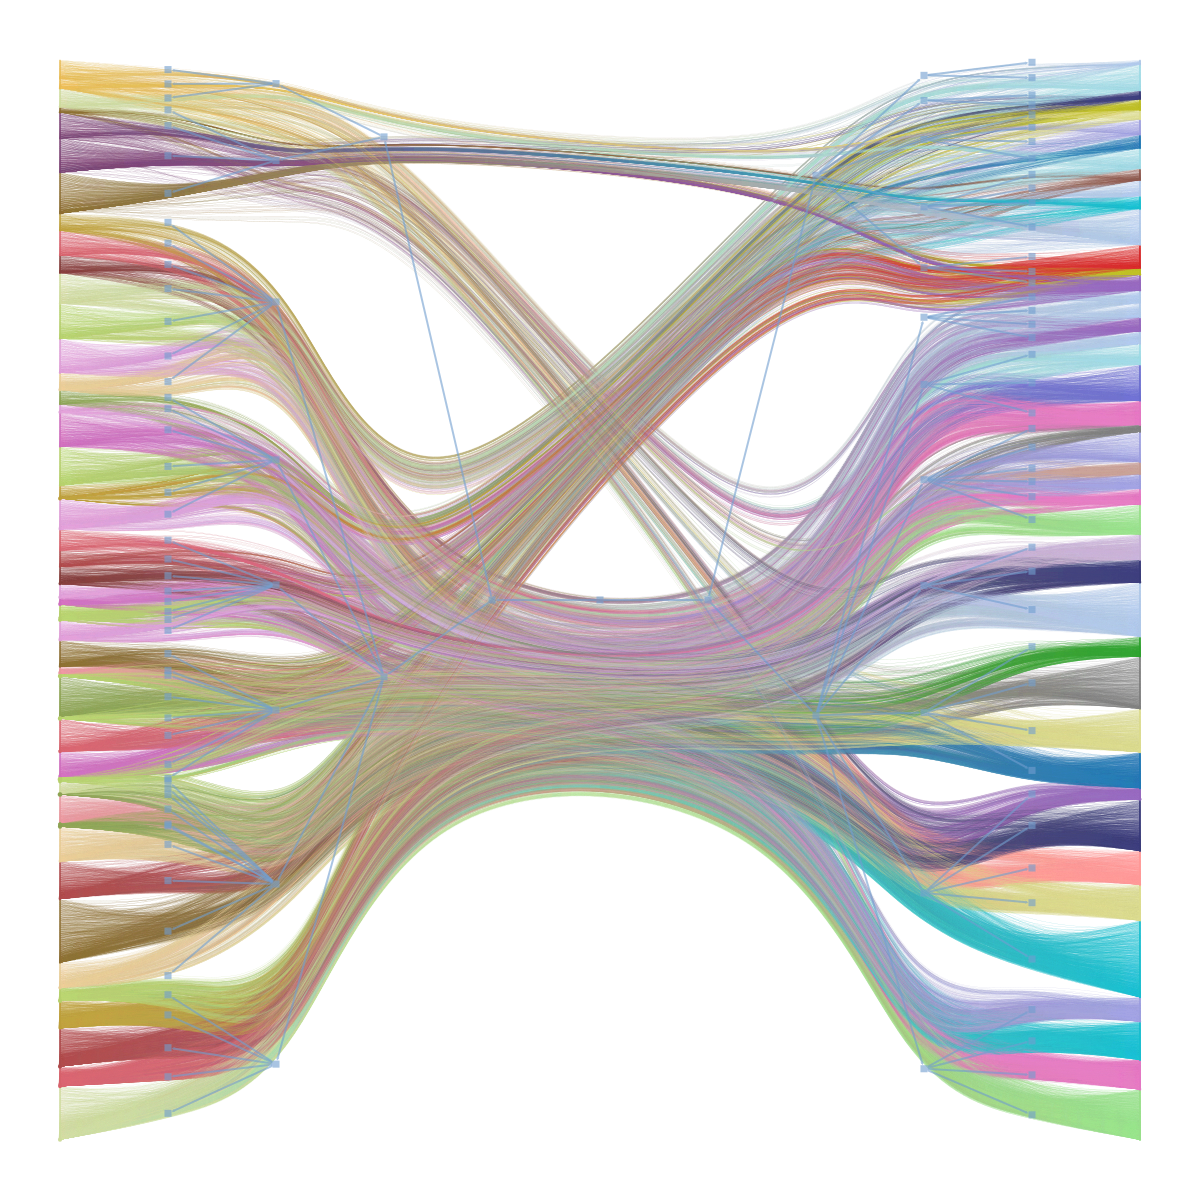

In [116]:
#Plotting the output

model.plot(nedges=100000)

In [117]:
model.topics(l=2,n=10)

{0: [('work', 0.02140780993302161),
  ('your', 0.019057247567294325),
  ('remote', 0.01630228737520536),
  ('this', 0.014482497156577784),
  ('from', 0.013901175281182863),
  ('travel', 0.013522052318968785),
  ('that', 0.013522052318968785),
  ('with', 0.012991280171869075),
  ('have', 0.012586882345507392),
  ('digital', 0.01091874131176545)],
 1: [('bali', 0.04307432432432432),
  ('most', 0.025619369369369368),
  ('places', 0.021114864864864864),
  ('para', 0.019144144144144143),
  ('look', 0.018862612612612614),
  ('thailand', 0.01632882882882883),
  ('trabajo', 0.016047297297297296),
  ('yang', 0.015765765765765764),
  ('real', 0.015202702702702704),
  ('feel', 0.014921171171171171)]}

In [86]:
import pandas
data = model.topics(l=1,n=30)

rows = []
for topic_nr, topic in data.items():
    for word, frequency in topic:
        rows.append([topic_nr, word, frequency])
        
df = pd.DataFrame(rows, columns=['Topic Nr', 'Word', 'Frequency'])
print(df)

     Topic Nr      Word  Frequency
0           0      your   0.093711
1           0      that   0.066493
2           0      with   0.063883
3           0      have   0.061894
4           0      what   0.043500
..        ...       ...        ...
295         9      open   0.007460
296         9  internet   0.007460
297         9     based   0.007460
298         9  products   0.007460
299         9    google   0.007246

[300 rows x 3 columns]


In [90]:
words = df[df['Topic Nr'] == 1][['Word']].values.tolist()

In [91]:
df[df['Topic Nr'] == 1][['Word']].to_clipboard(index=False)

In [101]:
import pyperclip
words = "\n".join(df[df['Topic Nr'] == 9]['Word'])
pyperclip.copy(words)

In [85]:
import pyperclip

def format_words(df, topic_number):
    # Filter the DataFrame for the given topic
    words = df[df['Topic Nr'] == topic_number]['Word'].tolist()
    
    # Grouping the words three per row
    formatted_words = "\n".join([" ".join(words[i:i+3]) for i in range(0, len(words), 3)])
    
    return formatted_words

# Example usage for Topic 0 (replace 'df' with your actual DataFrame variable name)
formatted_words = format_words(df, 1)
pyperclip.copy(formatted_words)

# This code will format the words such that there are three words per row, and then copy it to the clipboard.


In [61]:
model.clusters(l=0,n=10)

{0: [('7079886686729260334', 1.0),
  ('7134223348027968769', 1.0),
  ('7134126693001809179', 1.0),
  ('7154213435419692334', 1.0),
  ('6952657566736387333', 1.0),
  ('7194402476362190106', 1.0),
  ('7167000481632472325', 1.0),
  ('7118179645438168366', 1.0),
  ('7076610459763281157', 1.0),
  ('6968671617010437381', 1.0)],
 1: [('7090005501605448965', 1.0),
  ('7159543663570259242', 1.0),
  ('7108682880842272046', 1.0),
  ('7176414064170552581', 1.0),
  ('7079337459015830790', 1.0),
  ('7005728846427245830', 1.0),
  ('6974947947465182470', 1.0),
  ('7106220626213457195', 1.0),
  ('6916706095100710149', 1.0),
  ('7170192073868561710', 1.0)],
 2: [('7122067415155920155', 1.0),
  ('7079447346999790890', 1.0),
  ('6966798910237052165', 1.0),
  ('7106436325687053574', 1.0),
  ('7069969904962686250', 1.0),
  ('6985049014920023301', 1.0),
  ('7069342650687606022', 1.0),
  ('6856359036732984581', 1.0),
  ('7159477658118524166', 1.0),
  ('7093314600292158763', 1.0)],
 3: [('7161197446368955694',

In [120]:
number_of_topics = len(model.topics(l=2))
print(f"Number of topics inferred: {number_of_topics}")


Number of topics inferred: 2


In [124]:
#Save CSV files to the directory with code
model.clusters(l=1)

{0: [('7212031701193690410', 1.0),
  ('7262734972543454470', 1.0),
  ('7132532074686254341', 1.0),
  ('7151558722601356590', 1.0),
  ('7226809365917895962', 1.0),
  ('7219027952283995397', 1.0),
  ('7255206018727120133', 1.0),
  ('7219353394065067270', 1.0),
  ('7265697868864916741', 1.0),
  ('7067246806656126254', 1.0)],
 1: [('7014927154316135686', 1.0),
  ('7092938613389937966', 1.0),
  ('7095460160591678725', 1.0),
  ('7033655267841641734', 1.0),
  ('7212549944660593926', 1.0),
  ('7055001186574929199', 1.0),
  ('7195337744560737541', 1.0),
  ('7250168409319673114', 1.0),
  ('7245370888407780654', 1.0),
  ('7107072433382755589', 1.0)],
 2: [('7107798719692590342', 1.0),
  ('7158688014082837766', 1.0),
  ('7267597943820111146', 1.0),
  ('7169678993631808774', 1.0),
  ('7086560982524366085', 1.0),
  ('7230769533328379141', 1.0),
  ('7150259656626146602', 1.0),
  ('7210387558197382443', 1.0),
  ('7119611511089220906', 1.0),
  ('7201077285632363782', 1.0)],
 3: [('7088334922036825350',

In [123]:
model.plot_topic_dist

<bound method sbmtm.plot_topic_dist of <sbmtm.sbmtm object at 0x1c2fa9610>>

In [30]:
#Print all available methods and attributes in sbmtm
print([x for x in dir(model) if not x.startswith("__")])

['L', 'clusters', 'clusters_query', 'documents', 'fit', 'g', 'get_D', 'get_N', 'get_V', 'get_groups', 'group_membership', 'group_to_group_mixture', 'groups', 'load_graph', 'load_model', 'make_graph', 'make_graph_from_BoW_df', 'mdl', 'plot', 'plot_topic_dist', 'pmi_td_tw', 'print_summary', 'print_topics', 'save_data', 'save_graph', 'save_model', 'state', 'topicdist', 'topics', 'words']


In [34]:
## select a document (index)
i_doc = 2
print(i_doc,model.documents[i_doc])
## find all articles from the same group
## print: (doc-index, doc-title)
model.clusters_query(i_doc,l=1,)

2 6836490196624624902


[(20, '7220518544205696299'),
 (31, '7177924728559013163'),
 (37, '7208552276766625066'),
 (53, '7220064581438196998'),
 (64, '7195220843994090758'),
 (71, '7101893286587108651'),
 (73, '7195646230041726254'),
 (81, '7218214780862090538'),
 (96, '7184982540464246059'),
 (104, '7065658772483525893'),
 (109, '7174041303481617710'),
 (122, '7280091703212559647'),
 (145, '7213957256931675438'),
 (175, '7226356741238164782'),
 (199, '6914426104782605574'),
 (209, '7268311302030855456'),
 (217, '7260269199451245866'),
 (225, '7206831213041028358'),
 (234, '7084279263460904238'),
 (247, '7081048952400891138'),
 (260, '7246417369063509274'),
 (267, '7200211071683104042'),
 (273, '7237407205954243867'),
 (282, '6959225107784961285'),
 (290, '7167110783724195114'),
 (300, '7047230382479035695'),
 (304, '7219662928323104005'),
 (339, '7149985801961524486'),
 (341, '7191871557046717702'),
 (361, '7190893484360895786'),
 (411, '7208983229628534021'),
 (420, '7063216475313556783'),
 (432, '705575310

In [ ]:
# Save model parameters
with open('../pickle/sbmtm_model_sig_jan.pkl', 'wb') as f:
  pickle.dump(model.state, f) 

# Save model data like topics
model_data = {'topics': model.topics, 'words': model.words}  
with open('../pickle/sbmtm_topics_words_jan.pkl', 'wb') as f:
  pickle.dump(model_data, f)